# Megaman: Manifold Learning for Millions of Points

This notebook gives a brief example of using manifold learning to discover hidden structure within a dataset.
We use the [``megaman``](http://mmp2.github.io/megaman/) package, which implements efficient methods for large manifold learning applications.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## The Data

Here we will explore a dataset that is available within the megaman package, using the ``generate_megaman_manifold()`` function:

In [2]:
from megaman.datasets import generate_megaman_manifold

X, color = generate_megaman_manifold(sampling=3, random_state=42)
print(X.shape)

using svd to rotate
(6696, 8)


The data consists of nearly 7000 points in eight dimensions.
If we look at pairs of dimensions, we can see that there is some sort of regular structure within the data:

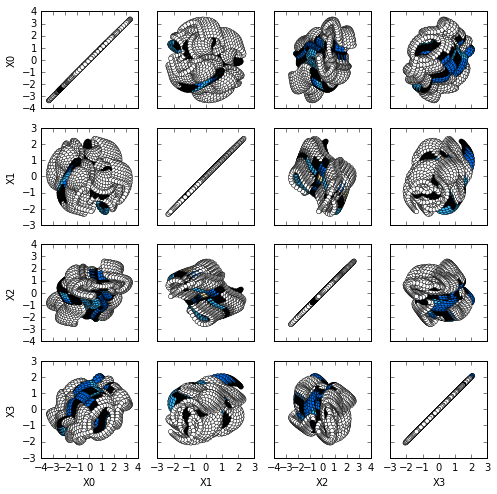

In [3]:
def pairwise_grid(X, labels=None):
    N = X.shape[1]
    if labels is None:
        labels = ['X{0}'.format(i) for i in range(N)]
    fig, ax = plt.subplots(N, N, figsize=(8, 8),
                           sharex='col', sharey='row')
    for i in range(N):
        for j in range(N):
            ax[j, i].scatter(X[:, i], X[:, j], c=color, lw=0.5)
            if j == N - 1:
                ax[j, i].set_xlabel(labels[i])
            if i == 0:
                ax[j, i].set_ylabel(labels[j])
            
pairwise_grid(X[:, :4])

It is obvious that there is some meaningful structure in this data, but it is difficult to determine from these pairwise coordinate exactly what this structure means.

## Linear Projections: PCA

One common approach to visualizing higher-dimensional data is to use [Principal Component Analysis](), which finds an optimal **linear** projection of the data that maximizes variance captured by each successive component.
We can do this in a few lines using the scikit-learn PCA implementation.
Here we will compute the first four principal components and plot their pairwise relationships:

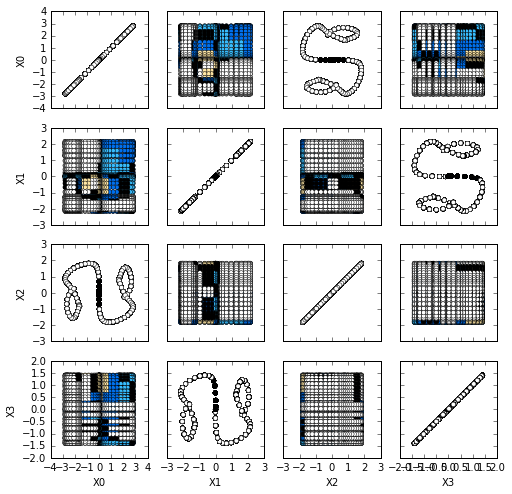

In [4]:
from sklearn.decomposition import PCA
X_pca = PCA(4).fit_transform(X)
pairwise_grid(X_pca)

The result shows some intriguing structure in the data: some of the component pairs show a grid-like distribution, while other component pairs show an evidently nonlinear – but univariate – sequence of points.
When there is evidence of nonlinear relationships within a dataset, a manifold method can sometimes be useful in extracting the intrinsic structure.

## Manifold Learning

Let's explore a *manifold learning* approach to visualizing this data.
Manifold Learning is a class of algorithms that finds *non-linear* low-dimensional projections of high-dimensional data, while maximizing some local metric that seeks to preserve relevant structure in the data.
The details of this local metric vary from algorithm to algorithm, and this results in slightly different views of the underlying data.

Here is an example of using the ``megaman`` package to perform a flavor of manifold learning called *Local Tangent Space Alignment*:

In [5]:
from megaman.embedding import LTSA
from megaman.geometry import Geometry

geom = Geometry(adjacency_kwds=dict(n_neighbors=6))
model = LTSA(geom=geom, eigen_solver='arpack', random_state=6)

X_ltsa = model.fit_transform(X)
print(X_ltsa.shape)

(6696, 2)


The result is a two-dimensional representation of the original 7000 points.
To see what comes out, we can plot the 2D LTSA-projected embedding of these points:

[-0.025, 0.025, 0.025, -0.025]

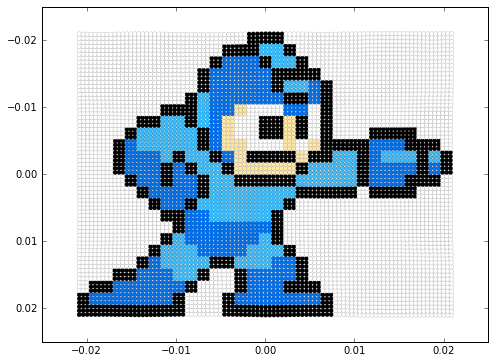

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_ltsa[:, 1], X_ltsa[:, 0], c=color, s=20, lw=0.1)
ax.axis([-0.025, 0.025, 0.025, -0.025])

Finally, we see what this data was: it was a simple 2D grid of points, contorted in a nonlinear manner into an eight-dimensional embedded space.
The manifold learning algorithm was able to see through this obscuration of the data, and pull out the input: a pose of the main character from the original [Nintendo Mega Man game](https://en.wikipedia.org/wiki/Mega_Man_%28video_game%29).

This is certainly a contrived example, but it shows the power of the manifold learning approach.
Manifold learning has also been shown to be useful in visualizing much more realistic datasets as well.
I invite you to read through our [paper describing the megaman package](http://arxiv.org/abs/1603.02763) for more information and references.